___
# Atividade: Variáveis qualitativas com a PNAD (ALUNOS)
___

## Aula 02


**Link úteis:**
1.	Leitura prévia necessária: Magalhães e Lima (7ª. Edição): pág. 9 a 16 – destacando para variáveis qualitativas.
2.	10 Minutes to Pandas: http://pandas.pydata.org/pandas-docs/stable/10min.html
3.	Essential Basic Functionality: http://pandas.pydata.org/pandas-docs/stable/basics.html
4.  Estude a aula `Aula02 Análise Exploratoria Variáveis Qualitativas-ALUNOS.ipynb`, o qual contém uma introdução ao Jupyter Notebook. A publicação dessa aula tem como objetivo auxiliá-lo, caso queira, no desenvolvimento dos seus próximos programas, como esta atividade.

**Hoje:**
1.	Analisar variáveis qualitativas de forma uni e bivariadas utilizando tabelas de frequências e gráficos de barras e de pizza (ou setor).
2.  Trabalhar com a base de dados da PNAD 2013 - Pesquisa Nacional por Amostra de Domicílios

**Próxima aula:**
1.	Leitura prévia necessária: Magalhães e Lima (7ª. Edição): pág. 9 a 17 – destacando para variáveis quantitativas; pág. 106 e 107 (Definição 4.1 e Exemplo 4.1).

___


___
## <font color='blue'>PNAD 2013 – PESQUISA NACIONAL POR AMOSTRA DE DOMICÍLIOS</font>

**Base de dados reduzida: ** `pes2013A.txt` (75 MB)
[Acesse a base de dados aqui: https://dl.dropboxusercontent.com/u/65763596/Aula02/pes2013A.txt] 

**Dicionário das variáveis: ** `Dicionário de variáveis de pessoas - PNAD 2013.xlsx`
[Acesse dicionário aqui: https://dl.dropboxusercontent.com/u/65763596/Aula02/Dicion%C3%A1rio%20de%20vari%C3%A1veis%20de%20pessoas%20-%20PNAD%202013.xls]


Muitos especialistas na área de negócios dizem que empresários mais bem sucedidos são aqueles que fazem um planejamento antes de começar seu próprio negócio. Nessa visão, imagine que o Sr. Gold tenha como grande objetivo abrir uma nova faculdade e para isso deseja estudar o perfil do estudante que cursa ensino médio ou pré-vestibular e do que cursa ensino superior. 

Assuma que as variáveis de interesse a respeito dos estudantes sejam relativamente as mesmas de 2013 até o momento atual. Nesse caso, seja criativo para ajudar o Sr. Gold que deseja abrir seu negócio, mas não tem certeza sobre quais variáveis o interessam. 

Vocês podem ajudá-lo?!  

As variáveis a seguir devem fazer parte da sua análise:

* V0302: sexo
* V0404: cor ou raça
* V6002: rede de ensino
* V4802: nível de ensino e grupos de séries do ensino fundamental que frequentavam (todos os estudantes)

** Crie uma variável com região do indivíduo amostrado considerando a variável `UF` que define o estado e também trabalhe com essa nova variável em suas análises. ** 

** Escolha mais pelo menos DUAS variáveis qualitativas para completar sua análise!! **

Faça uma análise exploratória apenas com as variáveis qualitativas com foco no objetivo do Sr. Gold.

Sua análise deve conter pelo menos uma das seguintes visualizações:

1. Gráfico de colunas (bar) e setor (pie) com as frequências relativas cadas categorias das variáveis qualitativas.
2. Tabela cruzada entre pares de variaveis qualitativas. Montar o gráfico de colunas. Repetir o processo habilitando a opção "stacked=True".


___



<font color='red'>
Crie um repositório chamado CD em seu Github
</font>


Neste repositório, salve seu trabalho numa pasta chamada aula2

Por exemplo, se seu login for *pikachu* o projeto vai estar na pasta:

https://github.com/<font color=red>pikachu/CD/aula2</font>



## <font color='red'>Terça-feira (dia 16/08), no horário de atendimento da sua turma, deverá apresentar aos NINJAS!!</font>
___

In [129]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import os
#matplotlib.style.use('ggplot')

In [130]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Usuario\Documents\Ciencia dos Dados\CD


In [131]:
dados = pd.read_table("pes2013A.txt", encoding="windows-1252", sep=" ")

In [132]:
'''
RENOMEANDO AS COLUNAS E DEFININDO-AS COMO QUALITATIVAS
V0302: sexo
V0404: cor ou raça
V6002: rede de ensino
V4802: nível de ensino e grupos de séries do ensino fundamental que frequentavam (todos os estudantes)
V5030: lugar de nascimento
'''
dados.rename(columns={"V8005":"IDADE"}, inplace=True)
dados.rename(columns={"V0302":"SEXO"}, inplace=True)
dados.rename(columns={"V0404":"COR OU RAÇA"}, inplace=True)
dados.rename(columns={"V6002":"REDE DE ENSINO"}, inplace=True)
dados.rename(columns={"V4802":"NÍVEL DE ENSINO E GRUPOS DE SÉRIES DO ENSINO FUNDAMENTAL QUE FREQUENTAVAM (TODOS OS ESTUDANTES)"}, inplace=True)
dados.rename(columns={"V5030": "LUGAR DE NASCIMENTO"}, inplace=True)
             
dados["SEXO"] = dados["SEXO"].astype('category')
dados["COR OU RAÇA"] = dados["COR OU RAÇA"].astype('category')
dados["REDE DE ENSINO"] = dados["REDE DE ENSINO"].astype('category')
dados["NÍVEL DE ENSINO E GRUPOS DE SÉRIES DO ENSINO FUNDAMENTAL QUE FREQUENTAVAM (TODOS OS ESTUDANTES)"] = dados["NÍVEL DE ENSINO E GRUPOS DE SÉRIES DO ENSINO FUNDAMENTAL QUE FREQUENTAVAM (TODOS OS ESTUDANTES)"].astype('category')

dados["LUGAR DE NASCIMENTO"] = dados["LUGAR DE NASCIMENTO"].astype('category')
#dados["UF"] = dados.UF.astype('category')



dados["REGIAO"] = dados.UF


dados = dados[(dados.IDADE >= 16) & (dados.IDADE < 35) & (dados["REDE DE ENSINO"] != 'NaN')]
#dados.head()

In [133]:
dados.REGIAO[(dados.UF >=10) & (dados.UF < 20)] = 1
dados.REGIAO[(dados.UF >=20) & (dados.UF < 30)] = 2
dados.REGIAO[(dados.UF >=30) & (dados.UF < 40)] = 3
dados.REGIAO[(dados.UF >=40) & (dados.UF < 50)] = 4
dados.REGIAO[(dados.UF >=50) & (dados.UF < 60)] = 5

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of

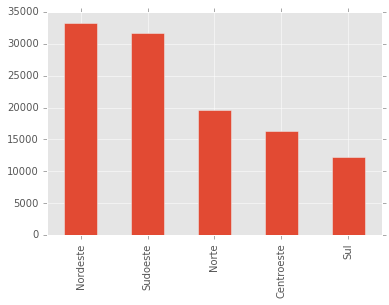

In [134]:
#dados["UF"] = dados["UF"].astype('category' , ordered = True)

dados["REGIAO"] = dados["REGIAO"].astype('category')
dados["REGIAO"].cat.categories = ("Norte", "Nordeste", "Sudoeste", "Centroeste", "Sul")

grafico_REGIAO = dados.REGIAO.value_counts()
grafico_REGIAO.plot(kind='bar')
#dados["REGIAO"]

In [135]:
'''Categorizando valores qualitativos e contando-os'''

dados["SEXO"].cat.categories = ('HOMEM','MULHER')
print(dados["SEXO"].value_counts(True)*100)



MULHER    50.677658
HOMEM     49.322342
Name: SEXO, dtype: float64


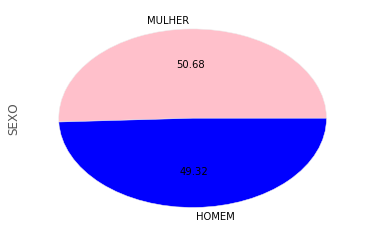

In [136]:
plt.style.use('ggplot')
grafico_sexo = dados.SEXO.value_counts()
grafico_sexo.plot(kind='pie', colors=('pink', 'blue'), autopct="%0.2f",legend=False)

In [137]:
dados["COR OU RAÇA"].cat.categories = ('Indígena','Branca','Preta','Amarela','Parda','Sem declaração')
porcentagem_educacao = dados["COR OU RAÇA"].value_counts(True)*100
#print(dados["COR OU RAÇA"].value_counts(True)*100)
#dados["COR OU RAÇA"]

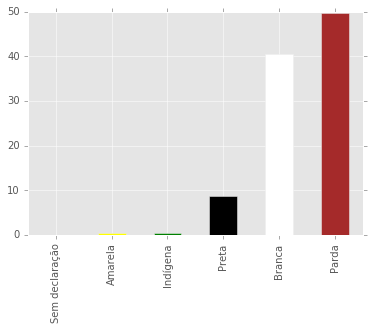

In [138]:
porcentagem_educacao = porcentagem_educacao.reindex(['Sem declaração', 'Amarela', 'Indígena', 'Preta', 'Branca', 'Parda' ])
porcentagem_educacao.plot(kind='bar', color=('blue', 'yellow','green','black','white','brown'), legend=False)
#porcentagem_educacao.plot(kind='pie', colors=('blue', 'red','purple','green','orange','white'), autopct="%0.2f",legend=False)

In [139]:
dados["REDE DE ENSINO"].cat.categories = ('PUBLICA','PRIVADA')
#dados_rede = dados["REDE DE ENSINO"== "NaN"] == "NaN"
#dados_rede.cat.categories = ('PUBLICA','PRIVADA')
print(dados["REDE DE ENSINO"].value_counts(True)*100)
#dados_rede

PUBLICA    65.297578
PRIVADA    34.702422
Name: REDE DE ENSINO, dtype: float64


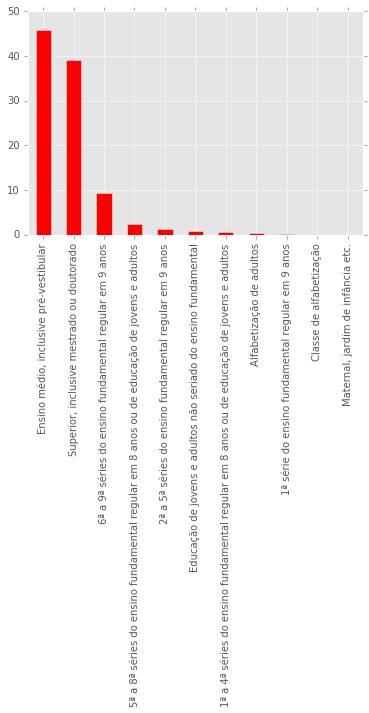

In [140]:
dados["NÍVEL DE ENSINO E GRUPOS DE SÉRIES DO ENSINO FUNDAMENTAL QUE FREQUENTAVAM (TODOS OS ESTUDANTES)"].cat.categories = ('Maternal, jardim de infância etc.','Classe de alfabetização','Alfabetização de adultos','1ª a 4ª séries do ensino fundamental regular em 8 anos ou de educação de jovens e adultos','5ª a 8ª séries do ensino fundamental regular em 8 anos ou de educação de jovens e adultos','1ª série do ensino fundamental regular em 9 anos','2ª a 5ª séries do ensino fundamental regular em 9 anos','6ª a 9ª séries do ensino fundamental regular em 9 anos','Educação de jovens e adultos não seriado do ensino fundamental','Ensino médio, inclusive pré-vestibular','Superior, inclusive mestrado ou doutorado',)
#print(dados["NÍVEL DE ENSINO E GRUPOS DE SÉRIES DO ENSINO FUNDAMENTAL QUE FREQUENTAVAM (TODOS OS ESTUDANTES)"].value_counts(True)*100)
porcentagem_nivel_de_ensino = dados["NÍVEL DE ENSINO E GRUPOS DE SÉRIES DO ENSINO FUNDAMENTAL QUE FREQUENTAVAM (TODOS OS ESTUDANTES)"].value_counts(True)*100
#dados["NÍVEL DE ENSINO E GRUPOS DE SÉRIES DO ENSINO FUNDAMENTAL QUE FREQUENTAVAM (TODOS OS ESTUDANTES)"]
porcentagem_nivel_de_ensino.plot(kind='bar', color="red")

In [141]:
REGIAOxNivel_de_Ensino = pd.crosstab(dados.REGIAO, dados["NÍVEL DE ENSINO E GRUPOS DE SÉRIES DO ENSINO FUNDAMENTAL QUE FREQUENTAVAM (TODOS OS ESTUDANTES)"] )
REGIAOxRede_de_ensino = pd.crosstab(dados.REGIAO,dados["REDE DE ENSINO"])


In [142]:
REGIAOxNivel_de_Ensino.sum()
REGIAOxRede_de_ensino

REDE DE ENSINO,PUBLICA,PRIVADA
REGIAO,,
Norte,4110,1366
Nordeste,6156,2378
Sudoeste,4377,3115
Centroeste,2351,1766
Sul,1877,1404


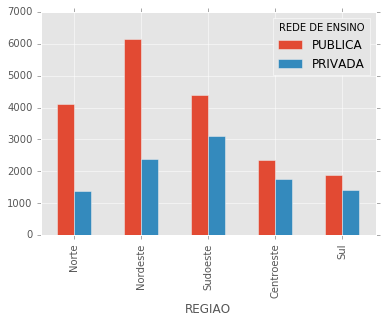

In [143]:
REGIAOxRede_de_ensino.plot(kind="bar")

Conclusão:

Ao analisar os dados, percebi que o melhor lugar para o Sr. Gold abrir uma faculdade seria na região Sudeste, devido a maior concentração de pessoas que fizeram ou fazem escolas particulares e o fato de ter uma concentração maior de pessoas.